# Creating Classification model and Analyzing Results

In [2]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) 
import plotly.express as px
import plotly.graph_objects as go
from nltk import sent_tokenize,word_tokenize,TweetTokenizer
from nltk.tokenize import LineTokenizer 
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import WordNetLemmatizer   
from nltk import pos_tag,FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
lt = LineTokenizer()
tt = TweetTokenizer()
twd = TreebankWordDetokenizer()
from nltk.corpus import wordnet
from nltk import pos_tag
import pickle
import gensim
#Defining stopwords
stopwords_en = stopwords.words('english')
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords_en)
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en)
# Loading the processed data
songs =  pd.read_csv('data/processed_songs.csv')

## Splitting the data into training and validation set

In [8]:

a  = songs[['genre','lemmatized_text']].groupby('genre').aggregate({'lemmatized_text':'\n'.join})

#Line tokenizing the text and using each line as an input to our model
folk = np.array(lt.tokenize(a.loc['Folk','lemmatized_text']))
df1 = pd.DataFrame(folk,columns = ['line'])
df1['genre'] = 'Folk'

hiphop = np.array(lt.tokenize(a.loc['HipHop','lemmatized_text']))
df2 = pd.DataFrame(hiphop,columns = ['line'])
df2['genre'] = 'HipHop'

kids = np.array(lt.tokenize(a.loc['Kids','lemmatized_text']))
df3 = pd.DataFrame(kids,columns = ['line'])
df3['genre'] = 'Kids'

rb = np.array(lt.tokenize(a.loc['RB','lemmatized_text']))
df4 = pd.DataFrame(rb,columns = ['line'])
df4['genre'] = 'RB'

pop = np.array(lt.tokenize(a.loc['Pop','lemmatized_text']))
df5 = pd.DataFrame(pop,columns = ['line'])
df5['genre'] = 'Pop'

rap = np.array(lt.tokenize(a.loc['Rap','lemmatized_text']))
df6 = pd.DataFrame(rap,columns = ['line'])
df6['genre'] = 'Rap'

rock = np.array(lt.tokenize(a.loc['Rock','lemmatized_text']))
df7 = pd.DataFrame(rock,columns = ['line'])
df7['genre'] = 'Rock'

line_song = pd.concat([df1,df2,df3,df4,df5,df6,df7])
line_song = line_song.reset_index(drop=True)

#We'll only consider sentences with more than 3 and less than 12 words

e = []
for i,j in enumerate(line_song['line']):
    if (len(tt.tokenize(j))<3) | (len(tt.tokenize(j))>12):
        e.append(i)
line_song = line_song.drop(e,axis=0)
line_song = line_song.reset_index(drop=True)

We have 158435 total lines which we will split into training and validation sets

In [11]:
x_train,x_test,y_train,y_test = train_test_split(line_song['line'],line_song['genre'],test_size=0.2,random_state=42)

# Creating a classification model

We'll create a classification model which when given an input of words, will predict which genre of music that line belongs to

We'll do this using two methods of word embeddings :- TF-IDF and Word2Vec.

After making the models,we will compare the results of the two models

## 1. TF-IDF Vectorizer

In [40]:
count = TfidfVectorizer(stop_words=stoplist_combined,ngram_range=(1,3),min_df=5,max_df=0.5)
count.fit(list(line_song['line']))

training_x = count.transform(list(x_train))
training_y  = y_train

test_x = count.transform(list(x_test))
test_y = y_test

F:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mon'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [58]:
from sklearn.naive_bayes import MultinomialNB
#from sklearn.linear_model import SGDClassifier
tfidf_model = MultinomialNB(alpha=0.01) 
tfidf_model.fit(training_x,training_y) 

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [60]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
predictions_valid = tfidf_model.predict(test_x)
print('Test accuracy = {}'.format(
        f1_score(test_y,predictions_valid,average ='micro') * 100),
      
     )
predictions_valid1 = tfidf_model.predict(training_x)
print('Training accuracy = {}'.format(
        f1_score(training_y,predictions_valid1,average ='micro') * 100)
     )

Test accuracy = 45.92735191087828
Training accuracy = 52.74876132167766


In [59]:
predictions_prob = tfidf_model.predict_proba(test_x)
predictions_prob1 = tfidf_model.predict_proba(training_x)
print('Test ROC_AUC score: {}'.format(roc_auc_score(test_y,predictions_prob,multi_class='ovr')))
print('Training ROC_AUC score: {}'.format(roc_auc_score(training_y,predictions_prob1,multi_class='ovr')))

Test ROC_AUC score: 0.8183227795790924
Training ROC_AUC score: 0.8812243360476769


### Making the Confusion Matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

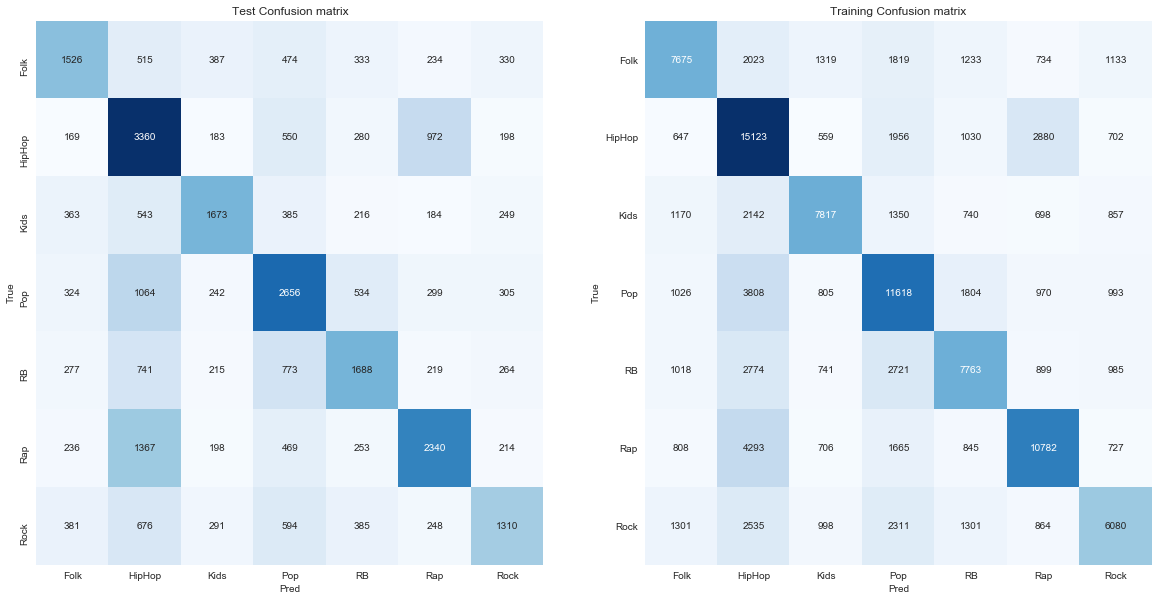

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(test_y, predictions_valid)
cm1 = confusion_matrix(training_y,predictions_valid1)
classes = np.unique(test_y)
fig, ax = plt.subplots(1,2,figsize = (20,10))
sns.heatmap(cm, annot=True, fmt='d',cmap=plt.cm.Blues, 
            cbar=False,ax = ax[0])
ax[0].set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Test Confusion matrix")

sns.heatmap(cm1, annot=True, fmt='d',cmap=plt.cm.Blues, 
            cbar=False,ax = ax[1])
ax[1].set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Training Confusion matrix")
plt.yticks(rotation=0)

## 2. Word2Vec embeddings

For this model we will import Google's pretrained Word2Vec model.

You can download Google’s pre-trained model [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit). It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.

I have already saved the file in the reopsitory with the name 'google_model.sav'

You can load the model using the following code written below:

In [99]:
#model = gensim.models.KeyedVectors.load_word2vec_format(file_path, binary=True, unicode_errors='ignore')   
# As the pre trained model is quite big, it takes a lot of time to save and load the model.
# So I have commented the commands required

filename = "google_model.sav"  
#pickle.dump(model,open(filename,'wb'))

models = pickle.load(open(filename, 'rb'))

### Encoding the data for word embedding

The word embeddings of our dataset can be learned while training a neural network on the classification problem. Before it can be presented to the network, the text data is first encoded so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API provided with Keras. We add padding to make all the vectors of same length (max_length). Below code converts the text to integer indexes, now ready to be used in Keras embedding layer.

In [100]:
corpus = list(pd.Series(x_train).apply(lambda x:tt.tokenize(x)))
bigrams_detector = gensim.models.phrases.Phrases(corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

from keras.preprocessing.text import Tokenizer
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)

dic_vocabulary = tokenizer_obj.word_index
corpus_seq = tokenizer_obj.texts_to_sequences(corpus)

from keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(corpus_seq, 
                    maxlen=12, padding="post", truncating="post")

In [101]:
# Doing the same for test dataset
t_corpus = x_test
lst_corpus = []
for string in x_test:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])

lst_text2seq = tokenizer_obj.texts_to_sequences(lst_corpus)
X_test = pad_sequences(lst_text2seq, maxlen=12,
             padding="post", truncating="post")

In [102]:
#Creating word embeddings
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  models[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

### Making the RNN model

In [103]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,GRU,Dropout,Flatten
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.optimizers import Adam

word2vec_model = Sequential()
embedding_layer = Embedding(23153,300,weights=[embeddings],
                     input_length =12,trainable=False)
word2vec_model.add(embedding_layer)
word2vec_model.add(LSTM(units=96,dropout=0.2,recurrent_dropout=0.2))
word2vec_model.add(Dense(512,activation='relu'))
word2vec_model.add(Dropout(0.3))
word2vec_model.add(Dense(512,activation='relu'))
word2vec_model.add(Dense(7,activation='softmax'))

word2vec_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [104]:
word2vec_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 12, 300)           6945900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 96)                152448    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               49664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3591      
Total params: 7,414,259
Trainable params: 468,359
Non-trainable params: 6,945,900
______________________________________

In [ ]:
# Training the model
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])## train
training = word2vec_model.fit(x=X_train, y=pd.get_dummies(y_train), batch_size=256, 
                     epochs=200, shuffle=True, verbose=0, 
                     validation_data = (X_test,pd.get_dummies(y_test)))

In [98]:
v = word2vec_model.predict(X_test)
n = np.unique(y_test)
pred = [n[j] for j in v.argmax(axis=1) ]
print('Test accuracy = {}'.format(
        accuracy_score(y_test,pred) * 100)
     )
v1 = word2vec_model.predict(X_train)
pred1 = [n[j] for j in v1.argmax(axis=1)]
print('Training accuracy = {}'.format(
        accuracy_score(y_train,pred1) * 100)
     )

Test accuracy = 52.45684350048916
Training accuracy = 90.19156120806639


In [64]:
print('Test ROC_AUC score: {}'.format(roc_auc_score(y_test,word2vec_model.predict(X_test),multi_class='ovr')))
print('Training ROC_AUC score: {}'.format(roc_auc_score(y_train,word2vec_model.predict(X_train),multi_class='ovr')))

Test ROC_AUC score: 0.8415166889166859
Training ROC_AUC score: 0.99263735035899


### Making confusion matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

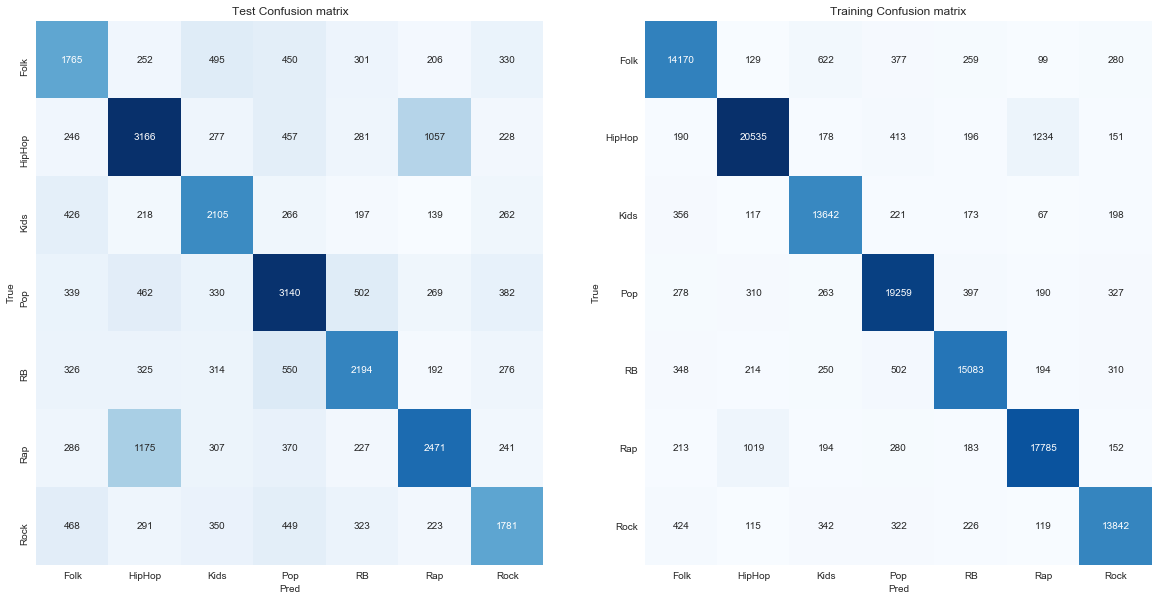

In [55]:
cm = confusion_matrix(y_test, pred)
cm1 = confusion_matrix(y_train,pred1)
classes = np.unique(test_y)
fig, ax = plt.subplots(1,2,figsize = (20,10))
sns.heatmap(cm, annot=True, fmt='d',cmap=plt.cm.Blues, 
            cbar=False,ax = ax[0])
ax[0].set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Test Confusion matrix")

sns.heatmap(cm1, annot=True, fmt='d',cmap=plt.cm.Blues, 
            cbar=False,ax = ax[1])
ax[1].set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Training Confusion matrix")
plt.yticks(rotation=0)

## Making a prediction system

In [68]:
wnl = WordNetLemmatizer()
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [86]:
#For tfidf
def preprocess_tfidf(text):
    text = text.lower()
    for i in tt.tokenize(text):
        b = twd.detokenize([wnl.lemmatize(i,get_wordnet_pos(i))])
        c = count.transform([b])
        return c
#For word2vec
def preprocess_word2vec(text):
    text = text.lower()
    b = tt.tokenize(text)
    c = tokenizer_obj.texts_to_sequences(b)
    d = pad_sequences([np.squeeze(c)],maxlen=12,padding='post',truncating='post')
    return d